In [7]:
import alpaca_trade_api as tradeapi
import pandas as pd
from datetime import datetime, timedelta
from utils_day_trade import backtest_plot

In [8]:
import alpaca_trade_api as tradeapi

API_KEY = 'PK55SJLN5X7L81OB9D1P'
SECRET_KEY = '3iWrQIdPWUlbNFV1wNcBzGx2JReYbMEQOXtx9rH0'
BASE_URL = 'https://paper-api.alpaca.markets'  # for paper trading

api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')

# Get your account info
account = api.get_account()
print(account.status)


ACTIVE


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')

start_date_str = '2024-07-07' #'2025-07-01' # 

# ✅ 修复 RFC3339 格式要求：无微秒、带 Z 时区后缀
end_date_str = datetime.utcnow().replace(microsecond=0).isoformat() + 'Z'
ticker = "NVDL"
bars = api.get_bars(
    symbol=ticker,
    timeframe='5Min',
    start=start_date_str,
    end=end_date_str,
    feed = 'iex'
).df

# 如果是 MultiIndex
if isinstance(bars.index, pd.MultiIndex):
    bars = bars[bars.index.get_level_values('symbol') == ticker]

print(bars.tail())

                            close   high    low  trade_count   open  volume  \
timestamp                                                                     
2025-07-08 19:35:00+00:00  71.870  71.92  71.87            6  71.90     647   
2025-07-08 19:40:00+00:00  71.790  71.87  71.79           12  71.87    1600   
2025-07-08 19:45:00+00:00  71.960  72.00  71.83           16  71.83    1949   
2025-07-08 19:50:00+00:00  72.020  72.04  71.90           37  71.97    4203   
2025-07-08 19:55:00+00:00  72.025  72.03  71.93           36  72.01    3638   

                                vwap  
timestamp                             
2025-07-08 19:35:00+00:00  71.896667  
2025-07-08 19:40:00+00:00  71.843174  
2025-07-08 19:45:00+00:00  71.971765  
2025-07-08 19:50:00+00:00  71.961106  
2025-07-08 19:55:00+00:00  71.987899  


In [10]:
# 下载 5 天的 5分钟级数据
data = bars
df = data.reset_index()
print('lastest time')
print(list(df['timestamp'])[-1])

lastest time
2025-07-08 19:55:00+00:00


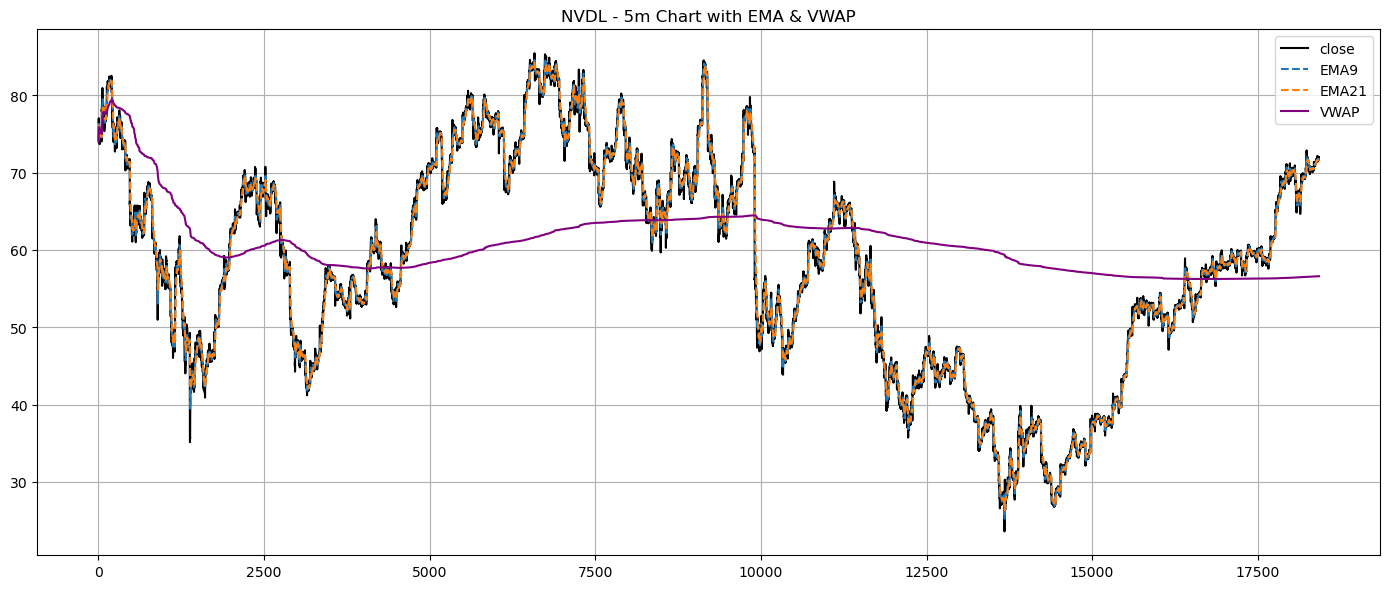

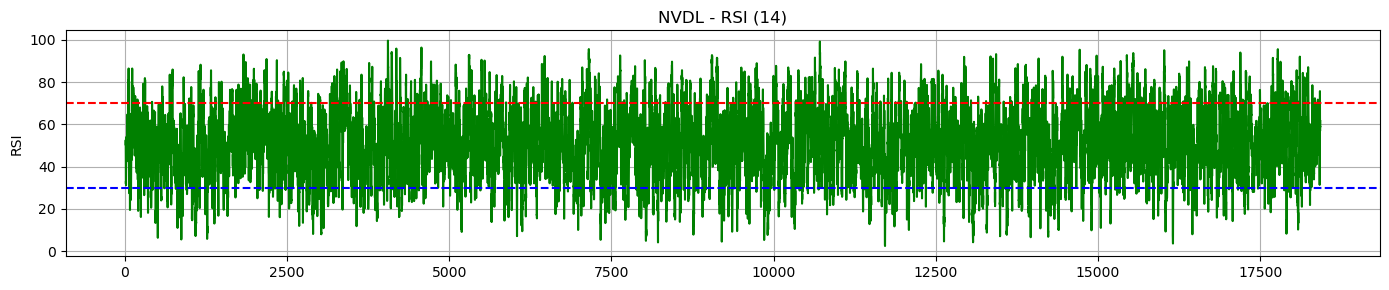

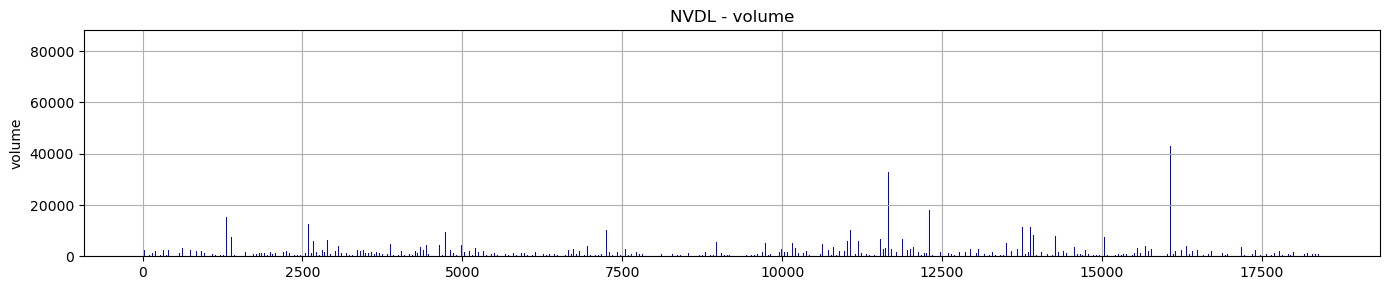

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



# 下载 5 天的 5分钟级数据
# data = yf.download(ticker, interval="5m", period="max")
#df = data.reset_index().droplevel(1, axis=1)
# 计算技术指标
df["EMA9"] = df["close"].ewm(span=9).mean()
df["EMA21"] = df["close"].ewm(span=21).mean()

# RSI
delta = df["close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))

# VWAP
df["Typical_Price"] = (df["high"] + df["low"] + df["close"]) / 3
df["Cum_TP_Vol"] = (df["Typical_Price"] * df["volume"]).cumsum()
df["Cum_volume"] = df["volume"].cumsum()
df["VWAP"] = df["Cum_TP_Vol"] / df["Cum_volume"]

# 主图
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["close"], label="close", color="black")
plt.plot(df.index, df["EMA9"], label="EMA9", linestyle="--")
plt.plot(df.index, df["EMA21"], label="EMA21", linestyle="--")
plt.plot(df.index, df["VWAP"], label="VWAP", color="purple")
plt.title(f"{ticker} - 5m Chart with EMA & VWAP")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# RSI 图
plt.figure(figsize=(14, 3))
plt.plot(df.index, df["RSI"], label="RSI", color="green")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="blue", linestyle="--")
plt.title(f"{ticker} - RSI (14)")
plt.ylabel("RSI")
plt.grid()
plt.tight_layout()
plt.show()

# volumn plot
plt.figure(figsize=(14, 3))
plt.bar(df.index, df["volume"], width=0.3, color="blue")
plt.title(f"{ticker} - volume")
plt.ylabel("volume")
plt.grid(True)
plt.tight_layout()
plt.show()

## original way

🔎 回测总结
                    Buy_Time                 Sell_Time  Buy_Price  Sell_Price  \
0  2024-07-12 13:55:00+00:00 2024-07-12 14:05:00+00:00     75.070       75.87   
1  2024-07-18 19:40:00+00:00 2024-07-18 19:50:00+00:00     65.180       64.69   
2  2024-07-19 19:10:00+00:00 2024-07-19 19:30:00+00:00     62.750       62.31   
3  2024-08-09 14:10:00+00:00 2024-08-09 14:15:00+00:00     46.375       46.84   
4  2024-08-09 17:05:00+00:00 2024-08-09 17:10:00+00:00     46.120       46.72   
..                       ...                       ...        ...         ...   
61 2025-06-17 16:00:00+00:00 2025-06-17 16:05:00+00:00     59.630       59.73   
62 2025-06-27 13:35:00+00:00 2025-06-27 13:40:00+00:00     69.040       68.92   
63 2025-06-27 19:40:00+00:00 2025-06-27 19:45:00+00:00     69.960       70.08   
64 2025-06-30 19:15:00+00:00 2025-06-30 19:20:00+00:00     70.250       70.54   
65 2025-07-01 16:40:00+00:00 2025-07-01 16:45:00+00:00     66.720       67.05   

      Return        

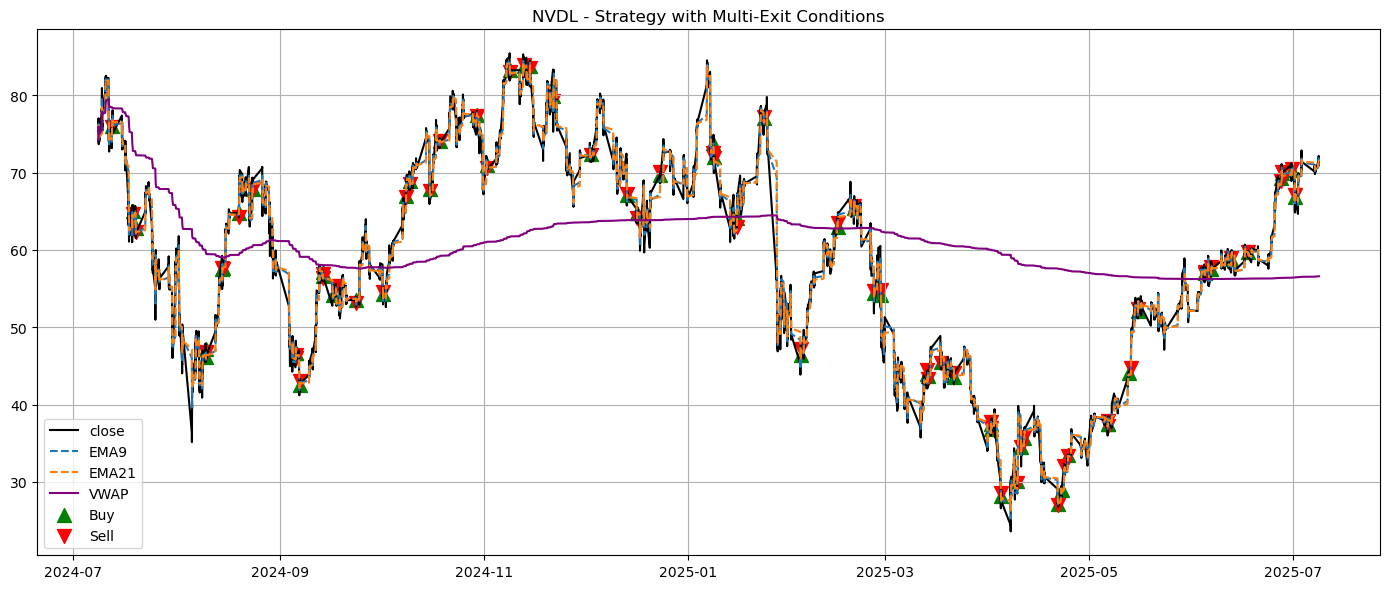

In [12]:
from utils_day_trade import generate_signals_and_backtest, get_latest_data
import pytz
ticker='NVDL'
df = get_latest_data(ticker,start_date=start_date_str)
eastern = pytz.timezone('US/Eastern')
df, trades = generate_signals_and_backtest(df)
    

backtest_plot(ticker,df,trades)

## 3 bars delay

NVDL
🔎 回测总结
                    Buy_Time                 Sell_Time  Buy_Price  Sell_Price  \
0  2024-07-12 14:10:00+00:00 2024-07-12 14:30:00+00:00     75.630      75.850   
1  2024-07-18 19:55:00+00:00 2024-07-19 13:45:00+00:00     65.240      65.300   
2  2024-07-19 19:25:00+00:00 2024-07-19 19:50:00+00:00     62.900      61.965   
3  2024-08-09 14:25:00+00:00 2024-08-09 14:45:00+00:00     46.165      46.560   
4  2024-08-09 17:20:00+00:00 2024-08-09 17:45:00+00:00     46.910      46.850   
..                       ...                       ...        ...         ...   
61 2025-06-17 16:15:00+00:00 2025-06-17 16:45:00+00:00     59.770      59.510   
62 2025-06-27 13:50:00+00:00 2025-06-27 14:10:00+00:00     68.480      69.410   
63 2025-06-27 19:55:00+00:00 2025-06-30 12:40:00+00:00     70.330      70.900   
64 2025-06-30 19:30:00+00:00 2025-06-30 19:50:00+00:00     70.430      70.940   
65 2025-07-01 16:55:00+00:00 2025-07-01 17:15:00+00:00     67.470      67.500   

      Return   

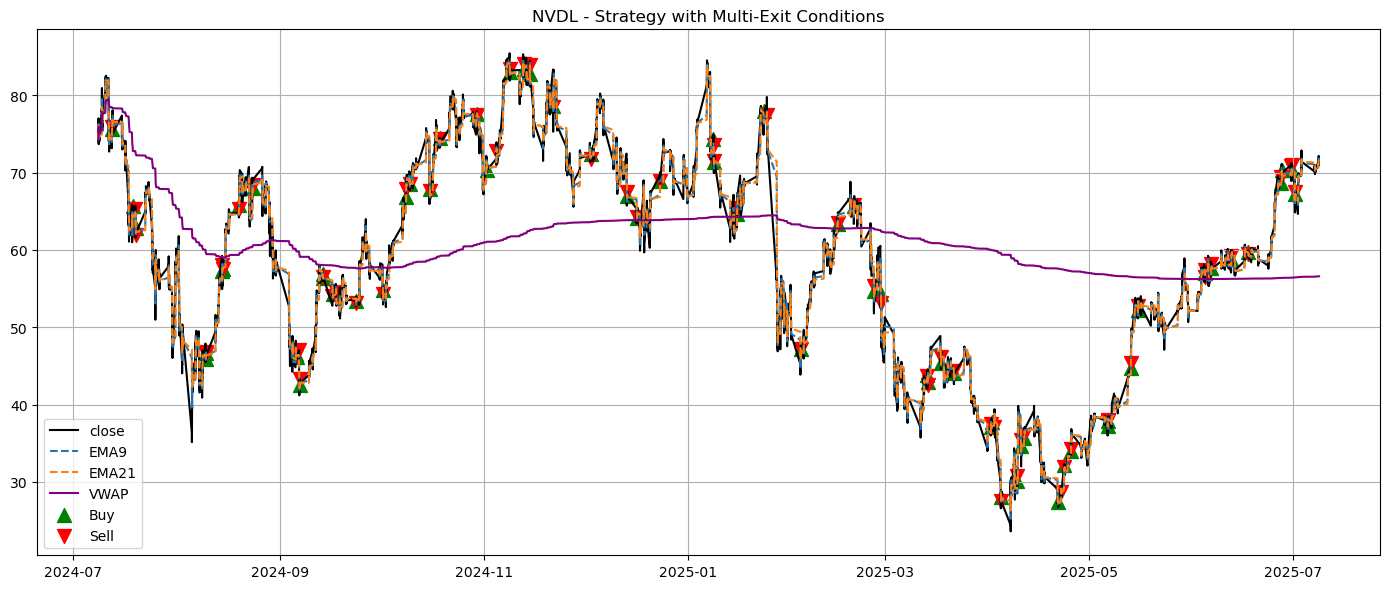

In [13]:

from utils_day_trade import generate_signals_and_backtest_delay
#['TSLL','QQQM','NVDL','AAPL']: 
for ticker in  ['NVDL']: #['TSLL','NVDL','NVDA','TQQQ','GLD']:
 
    print(ticker)
    df = get_latest_data(ticker,start_date=start_date_str)
    df,trades = generate_signals_and_backtest_delay(df,3)

    backtest_plot(ticker,df,trades)


## rsi method

TSLL
🔎 回测总结
                     Buy_Time                 Sell_Time  Buy_Price  \
0   2024-07-08 17:55:00+00:00 2024-07-08 18:20:00+00:00     14.650   
1   2024-07-11 13:35:00+00:00 2024-07-11 14:00:00+00:00     16.210   
2   2024-07-11 17:20:00+00:00 2024-07-11 17:50:00+00:00     14.035   
3   2024-07-11 18:45:00+00:00 2024-07-11 19:05:00+00:00     13.595   
4   2024-07-11 19:10:00+00:00 2024-07-11 19:30:00+00:00     13.565   
..                        ...                       ...        ...   
394 2025-07-03 14:25:00+00:00 2025-07-03 14:45:00+00:00     11.460   
395 2025-07-07 17:15:00+00:00 2025-07-07 17:35:00+00:00      9.850   
396 2025-07-07 17:45:00+00:00 2025-07-07 18:10:00+00:00      9.840   
397 2025-07-08 16:35:00+00:00 2025-07-08 16:55:00+00:00     10.480   
398 2025-07-08 20:30:00+00:00 2025-07-08 20:55:00+00:00     10.220   

     Sell_Price    Return         Sell_Reason  
0        14.630 -0.001365        Loss ≤ -0.5%  
1        16.790  0.035780            RSI ≥ 60  
2  

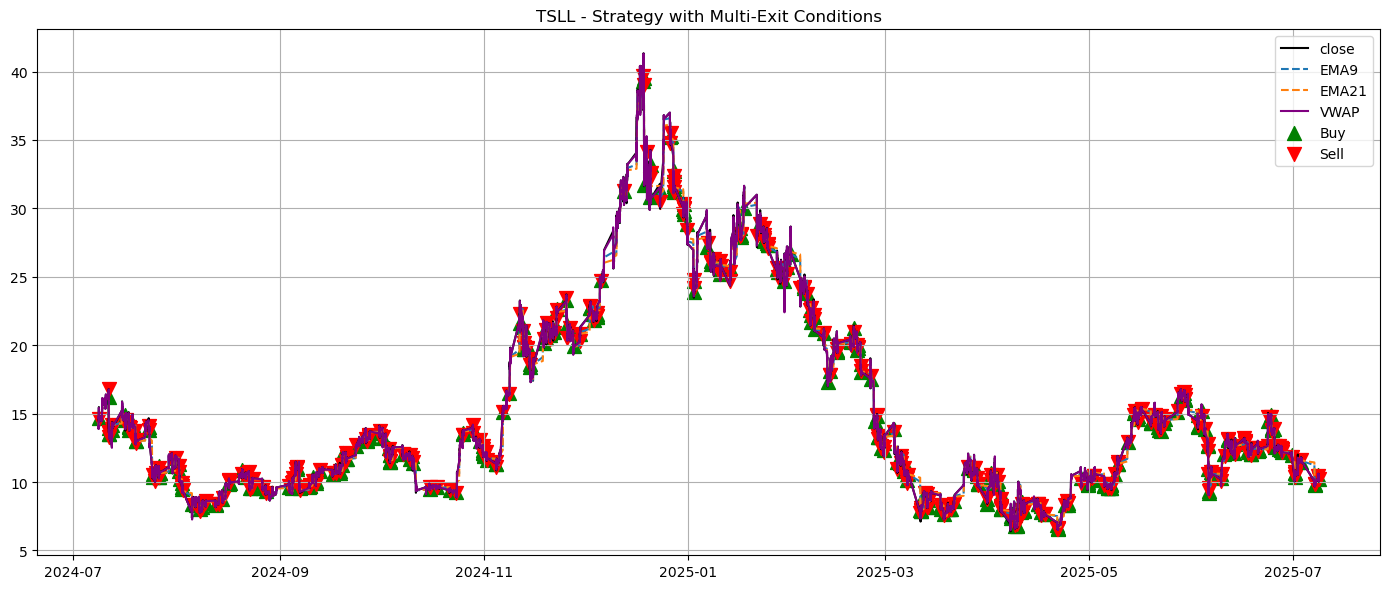

NVDL
🔎 回测总结
                     Buy_Time                 Sell_Time  Buy_Price  \
0   2024-07-08 15:50:00+00:00 2024-07-08 16:30:00+00:00     75.330   
1   2024-07-09 18:00:00+00:00 2024-07-09 18:50:00+00:00     76.950   
2   2024-07-11 18:45:00+00:00 2024-07-11 19:20:00+00:00     75.280   
3   2024-07-15 14:25:00+00:00 2024-07-15 15:05:00+00:00     75.000   
4   2024-07-15 17:05:00+00:00 2024-07-15 17:25:00+00:00     74.030   
..                        ...                       ...        ...   
359 2025-07-02 18:55:00+00:00 2025-07-02 19:15:00+00:00     69.270   
360 2025-07-07 13:35:00+00:00 2025-07-07 14:10:00+00:00     70.810   
361 2025-07-07 14:05:00+00:00 2025-07-07 14:45:00+00:00     70.560   
362 2025-07-07 14:50:00+00:00 2025-07-07 15:10:00+00:00     70.735   
363 2025-07-07 15:55:00+00:00 2025-07-07 16:20:00+00:00     70.370   

     Sell_Price    Return         Sell_Reason  
0        74.195 -0.015067        Loss ≤ -0.5%  
1        77.300  0.004548            RSI ≥ 60  
2  

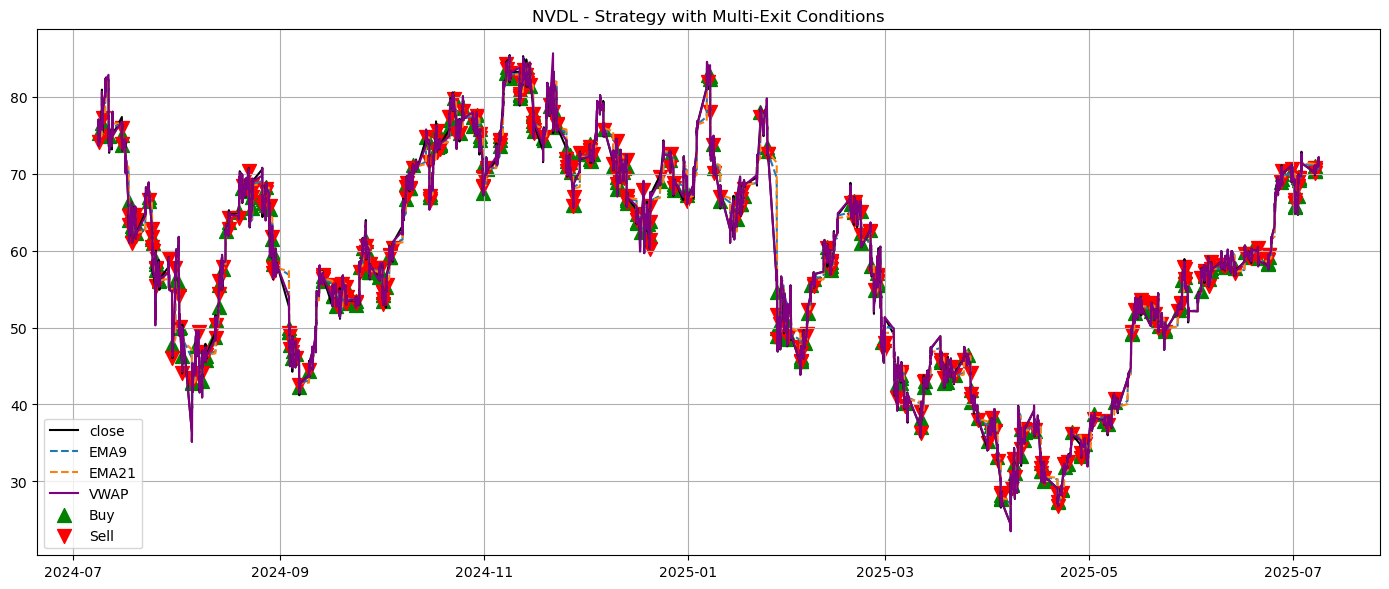

In [5]:

from utils_day_trade import get_latest_data, generate_rsi3070_signals_and_backtest_delay,backtest_plot,max_consecutive_losses
#['TSLL','QQQM','NVDL','AAPL']: 
start_date_str = '2024-07-07'
for ticker in  ['TSLL','NVDL']: #,'NVDA','TQQQ','GLD']:
 
    print(ticker)
    df = get_latest_data(ticker,start_date=start_date_str)
    df,trades = generate_rsi3070_signals_and_backtest_delay(df,3,40,60)
    backtest_plot(ticker,df,trades)


In [6]:

import pandas as pd

# 创建 DataFrame
df_trades = pd.DataFrame(trades)

# 去除时间列的时区（如果存在）
for col in ["Buy_Time", "Sell_Time"]:
    if col in df_trades.columns:
        df_trades[col] = pd.to_datetime(df_trades[col]).dt.tz_localize(None)

# 导出为 Excel


# Get the longest losing streak
max_losing_streak = max_consecutive_losses(df_trades)
print(max_losing_streak)
df_trades.to_excel("NVDL_rsi_method.xlsx", index=False)


7
